<a href="https://colab.research.google.com/github/AlyssaTang/FutureMakers/blob/main/Predicting_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Predict house prices using a simple feed-forward neural network model

In [3]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving housepricedata.csv to housepricedata.csv


In [5]:
import io
# df = pd.read_csv('housepricedata.csv')
df = pd.read_csv(io.BytesIO(uploaded['housepricedata.csv']))

In [6]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


# Preproccessing

- Read in the CSV (comma separated values) file and convert them to arrays.
- Split our dataset into the input features and the label.
- Scale the data so that the input features have similar orders of magnitude.
- Split our dataset into the training set, the validation set and the test set.

In [7]:
#store values of df into varialbe dataset (to convert dataframe into an array)
dataset = df.values

In [8]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [9]:
#X = all the rows for the first 10 columns (columns 0-9)
X = dataset[:,0:10]

In [10]:
#Y= last column of our array
Y = dataset[:,10]

In [13]:
from sklearn import preprocessing

In [12]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X) #scales dataset so all input features like between [0,1]

In [14]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [17]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
# X_train (10 input features, 70% of full dataset)
# X_val (10 input features, 15% of full dataset)
# X_test (10 input features, 15% of full dataset)
# Y_train (1 label, 70% of full dataset)
# Y_val (1 label, 15% of full dataset)
# Y_test (1 label, 15% of full dataset)

In [18]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


# Building and Training the Neural Network (1)

In [62]:
from keras.models import Sequential
from keras.layers import Dense

In [75]:
model_3 = Sequential([
    Dense(32, activation='relu', input_shape=(10,)), #10 input features
    Dense(32, activation='relu'), #fully-connected layer 
    Dense(1, activation='sigmoid'),
])

In [76]:
model_3.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [77]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 11ms/step - loss: 0.6993 - accuracy: 0.4597 - val_loss: 0.6906 - val_accuracy: 0.6073
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5898 - val_loss: 0.6824 - val_accuracy: 0.6895
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6797 - accuracy: 0.6878 - val_loss: 0.6761 - val_accuracy: 0.6530
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6739 - accuracy: 0.6616 - val_loss: 0.6711 - val_accuracy: 0.6667
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6687 - accuracy: 0.6932 - val_loss: 0.6664 - val_accuracy: 0.7032
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6671 - accuracy: 0.7379 - val_loss: 0.6618 - val_accuracy: 0.7078
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6588 - accuracy: 0.6725 - val_loss: 0.6573 - val_accuracy: 0.7352
Epoch 8/100


In [78]:
#to find accuracy (index 1)
model_3.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.3075 - accuracy: 0.8721


0.8721461296081543

# Visualizing Loss & Accuracy

In [79]:
import matplotlib.pyplot as plt

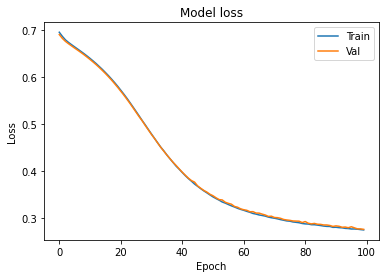

In [80]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

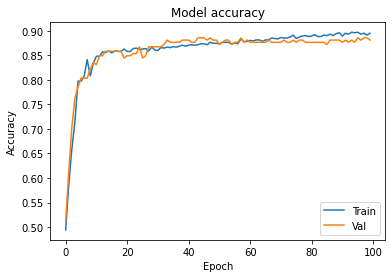

In [81]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Badly overfitting Neural Network

In [91]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [92]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [93]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 49ms/step - loss: 0.5364 - accuracy: 0.7180 - val_loss: 0.3653 - val_accuracy: 0.8311
Epoch 2/100
32/32 [==============================] - 1s 38ms/step - loss: 0.3300 - accuracy: 0.8743 - val_loss: 0.3037 - val_accuracy: 0.8676
Epoch 3/100
32/32 [==============================] - 1s 38ms/step - loss: 0.3278 - accuracy: 0.8666 - val_loss: 0.2922 - val_accuracy: 0.8813
Epoch 4/100
32/32 [==============================] - 1s 39ms/step - loss: 0.2721 - accuracy: 0.9012 - val_loss: 0.3083 - val_accuracy: 0.8767
Epoch 5/100
32/32 [==============================] - 1s 39ms/step - loss: 0.2826 - accuracy: 0.8849 - val_loss: 0.2555 - val_accuracy: 0.8858
Epoch 6/100
32/32 [==============================] - 1s 38ms/step - loss: 0.2531 - accuracy: 0.9036 - val_loss: 0.3229 - val_accuracy: 0.8858
Epoch 7/100
32/32 [==============================] - 1s 38ms/step - loss: 0.2403 - accuracy: 0.9059 - val_loss: 0.2563 - val_accuracy: 0.8858
Epoch 

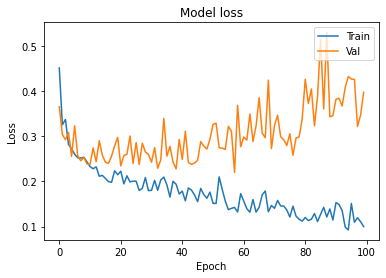

In [97]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
plt.plot(hist_2.history['acc'])
plt.plot(hist_2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## L2 regularization & Dropout Added

In [99]:
from keras.layers import Dropout
from keras import regularizers

In [100]:
model_4 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)), #This tells Keras to include the squared values of those parameters in our overall loss function, and weight them by 0.01 in the loss function.
    Dropout(0.3), #neurons in the previous layer has a probability of 0.3 in dropping out during training.
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [101]:
model_4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [102]:
hist_4 = model_4.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 4s 67ms/step - loss: 21.1127 - accuracy: 0.5468 - val_loss: 3.9213 - val_accuracy: 0.6986
Epoch 2/100
32/32 [==============================] - 2s 52ms/step - loss: 2.4986 - accuracy: 0.7916 - val_loss: 0.6524 - val_accuracy: 0.8676
Epoch 3/100
32/32 [==============================] - 2s 50ms/step - loss: 0.5906 - accuracy: 0.8785 - val_loss: 0.5219 - val_accuracy: 0.8676
Epoch 4/100
32/32 [==============================] - 2s 51ms/step - loss: 0.5067 - accuracy: 0.8726 - val_loss: 0.4670 - val_accuracy: 0.8767
Epoch 5/100
32/32 [==============================] - 2s 50ms/step - loss: 0.4917 - accuracy: 0.8898 - val_loss: 0.4620 - val_accuracy: 0.8813
Epoch 6/100
32/32 [==============================] - 2s 50ms/step - loss: 0.4817 - accuracy: 0.8774 - val_loss: 0.4511 - val_accuracy: 0.8858
Epoch 7/100
32/32 [==============================] - 2s 51ms/step - loss: 0.4588 - accuracy: 0.8921 - val_loss: 0.5488 - val_accuracy: 0.8082
Epoch

## Visualizing Loss & Accuracy

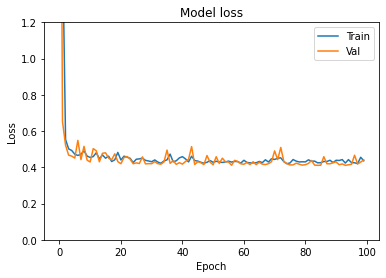

In [103]:
plt.plot(hist_4.history['loss'])
plt.plot(hist_4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

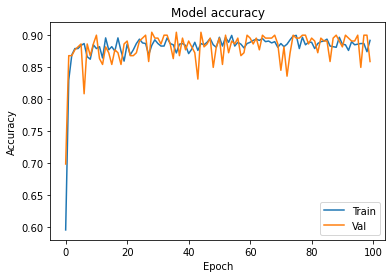

In [104]:
plt.plot(hist_4.history['accuracy'])
plt.plot(hist_4.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Building and Training the Neural Network (Changing hyperparameters)

Experimentation

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [84]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)), #10 input features
    Dense(32, activation='relu'), #fully-connected layer 
    Dense(1, activation='sigmoid'),
])

In [85]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [45]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=130,
          validation_data=(X_val, Y_val))

Epoch 1/130
32/32 [==============================] - 0s 3ms/step - loss: 0.2802 - accuracy: 0.8933 - val_loss: 0.2799 - val_accuracy: 0.8767
Epoch 2/130
32/32 [==============================] - 0s 2ms/step - loss: 0.2802 - accuracy: 0.8904 - val_loss: 0.2799 - val_accuracy: 0.8813
Epoch 3/130
32/32 [==============================] - 0s 3ms/step - loss: 0.2795 - accuracy: 0.8924 - val_loss: 0.2775 - val_accuracy: 0.8767
Epoch 4/130
32/32 [==============================] - 0s 3ms/step - loss: 0.2790 - accuracy: 0.8914 - val_loss: 0.2770 - val_accuracy: 0.8767
Epoch 5/130
32/32 [==============================] - 0s 2ms/step - loss: 0.2786 - accuracy: 0.8894 - val_loss: 0.2787 - val_accuracy: 0.8813
Epoch 6/130
32/32 [==============================] - 0s 3ms/step - loss: 0.2780 - accuracy: 0.8904 - val_loss: 0.2773 - val_accuracy: 0.8813
Epoch 7/130
32/32 [==============================] - 0s 2ms/step - loss: 0.2767 - accuracy: 0.8953 - val_loss: 0.2760 - val_accuracy: 0.8767
Epoch 8/130
3

## Results

loss: 0.2779 - accuracy: 0.8950 - val_loss: 0.2754 - val_accuracy: 0.8813 with optimizer SGD

loss: 0.1513 - accuracy: 0.9364 - val_loss: 0.2771 - val_accuracy: 0.8858 with optimizer Adam

loss: 0.1328 - accuracy: 0.9472 - val_loss: 0.2899 - val_accuracy: 0.8767 with 200 epochs & Adam
loss: 0.2500 - accuracy: 0.9012 - val_loss: 0.2544 - val_accuracy: 0.8995 with 130 epochs & Adam, test  loss: 0.2254 - accuracy: 0.9041


In [88]:
#to find accuracy (index 1)
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2254 - accuracy: 0.9041


0.9041095972061157

# Visualizing Loss & Accuracy

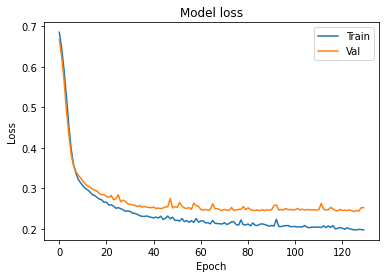

In [89]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

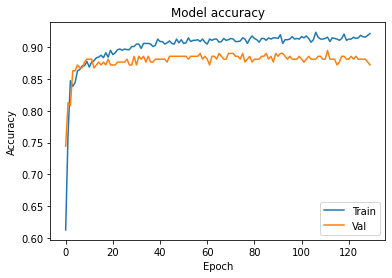

In [90]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()